<a href="https://colab.research.google.com/github/Deep-Learning-in-Multimedia/jupyter-notebook-Niick95/blob/master/Niklas_Holtz_Deep_Dream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Deep Dream
 
 A 'Deep Learning in Multimedia' project by Niklas Holtz (Master Informatik), summer term 2020.
 
 

# Introduction


 



## What is Deep Dream?
 
DeepDream is software that is based on *artificial neural networks* and was first developed and published by Google employee Alexander Mordvintsev. *Convolutional Neural Networks (**CNN**)* are used, which are actually used to recognize and classify content. However, it is used here to insert structures in the image that look similar to those of the trained neural network.

Here you can see a painting that was expanded by a CNN with different structures. The CNN was trained to detect birds.
![A "deep dream" picture with a network trained on birds.](https://b2h3x3f6.stackpathcdn.com/assets/landing/img/gallery/4.jpg)
This image was generated by https://deepdreamgenerator.com

## How it works

The *Deep Dream* is based on CNNs that have already been trained using sample images so that they can correctly recognize the objects mapped in their data set. Instead of recognizing the object of the input image, the CNN is used to change the image through selected layers.

### What is a CNN?

A CNN consists of several *convolutional layers*, followed by a *pooling layer*. This combination can be repeated any number of times, which is why this is also known as **deep learning**. Small filter matrices are pushed over the image in the convolution layer. The pooling layer then filters unnecessary information and reduces the image. Finally, there is usually a fully connected layer that classifies the recognized objects.

Different matrices are created for each layer of the image, which reflect the neuronal activity. The deeper a layer is, the more special the matrices are. Upper layers therefore mostly contain only vague structures, while lower layers can already contain parts that are recognizable to humans.


![CNN Overview](https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)
This image was taken from https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

![Deep Visualization](https://www.mdpi.com/electronics/electronics-08-00105/article_deploy/html/images/electronics-08-00105-g001.png)
This image was taken from https://www.mdpi.com/


### Using CNNs to extend images

The algorithm changes the input image until the CNN can recognize the image based on it's data set. During the expansion, different layers of the CNN can be selectively increased in order to obtain different results. In the following picture the algorithm with prioritization of upper layers was applied. As a result, various rough structures were inserted into the input image.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Deep_Dream_of_Electric_Sheep.jpg/330px-Deep_Dream_of_Electric_Sheep.jpg)
This image was taken from https://www.wikipedia.org/

## Motivation and benefits

The potential of what neural networks offer is considerable. But the deeper a network is, the more difficult it is to understand how the learning process works. **Deep visualization** is an important tool for debugging and optimizing models. Various methods are used to visualize, for example, the intermediate activations of the individual layers. *Deep Dream* is certainly a kind of art, but it also offers the possibility to adequately visualize the activation of the neurons of different layers in order to further optimize the network.


## Goals / Milestones

1.   **Train a CNN**. First of all, a trained CNN is required, which can already recognize objects of the data set. Input images from existing data sets should be used. Known data sets are, for example, NIST, Imagenet or MIRFLICKR.
2.   **Implement the Deep Dream**. The deep dream algorithm is then to be implemented on the basis of the trained CNN. Keras is to be used as a deep learning library.



# Implementation

This chapter explains the implementation of the algorithm using an example. To do this, a new model is first created, trained and validated. Based on this, the Deep Dream algorithm is finally implemented.

## Creating a Model from Scratch

In order to create the simplest possible model, data is downloaded from Kaggle. The data setcontains 2000 JPG pictures of dogs and cats. Check out the link below for more information. It **consits** of a `train` and a `validation` subdirectories for the training and validation datasets. Both are extracted to the the local directory `/tmp/cats_and_dogs_filtered`.

https://www.kaggle.com/c/dogs-vs-cats/data




In [18]:
import tensorflow as tf
from tensorflow import keras
import os
import zipfile

# Download the zip file, unzip it and save it locally in /tmp
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

tmp_tip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(tmp_tip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# This is the base directory
base_dir = '/tmp/cats_and_dogs_filtered'
# The subdirectory for training
train_dir = os.path.join(base_dir, 'train')
# The subdirectory for validation
validation_dir = os.path.join(base_dir, 'validation')

# Now the training and validation pictures of dogs and cats are saved individually
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_file_names = os.listdir(train_cats_dir)
train_dog_file_names = os.listdir(train_dogs_dir)
  
# In order to have an overview of how much data has been loaded in total, the number of elements within each folder is outputted here.
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))


--2020-05-18 07:22:46--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   199MB/s    in 0.3s    

2020-05-18 07:22:46 (199 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


---
To get a first impression of how the images look within the data set, they are output here using matplot. Of course, this is not absolutely necessary for the creation of the model.

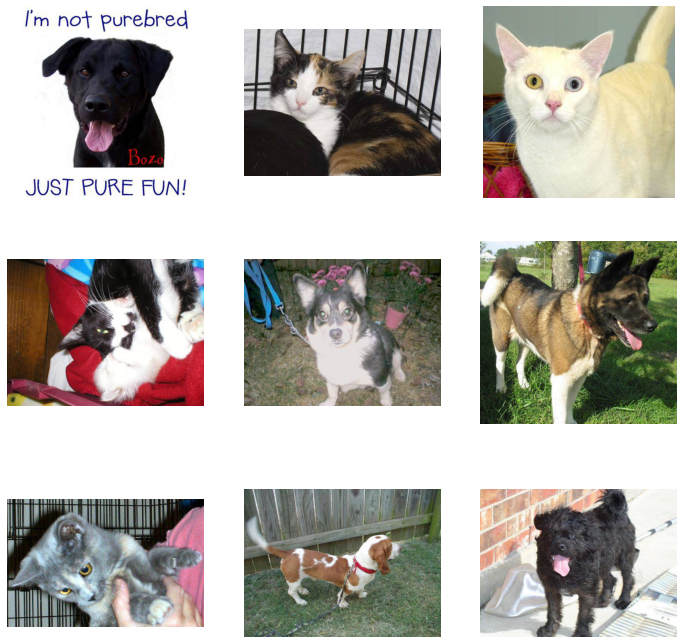

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_dataset(rows=4, cols=4):
  fig = plt.gcf()
  # size of the images
  fig.set_size_inches(rows * 4, cols * 4)
  cntr = 0
  
  total_count = rows * cols

  cat_pics = [os.path.join(train_cats_dir, file_name) for file_name in train_cat_file_names]
  dog_pics= [os.path.join(train_dogs_dir, file_name) for file_name in train_dog_file_names]
  all_pics = cat_pics + dog_pics

  while cntr < (rows * cols):
    pic = random.choice(all_pics)
    pic_path = os.path.abspath(pic)

    plots = plt.subplot(rows, cols, cntr + 1)
    plots.axis('off')
    pic_data = mpimg.imread(pic_path)
    plt.imshow(pic_data)
    cntr += 1
  plt.show()

plot_dataset(3, 3)





---
The architecture of the CNN is now determined at this point. The classic CNN architecture usually consists of several convolution layers, pooling layers and one or more fully connected layers. After researching and comparing with other neural networks, I decided to use **four** convolution layers. The filter size of them is continuously increasing from 16 up to 128. In addition, the use the ReLU activation function (rectified linear unit). 

See the keras documentation for additional information about activation functions: https://keras.io/api/layers/activations/

The pooling layers will use simple MaxPooling2D. Take a look a at the following link for more information. https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

In order to process the images, it is also necessary to determine a final size of the input data. I chose 150x150 here.

Finally, two fully connected are added, which will later classify the two animal species. The first layer will use a ReLU activation function with 512 hidden units. The second layer, on the other hand, uses a sigmoid activation to generate a scalar between 0 and 1.

In theory, these layers are not absolutely necessary for the later deep dream algorithm, but the CNN must first be trained and validated.



In [10]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Input feature map with a size of 150x150 and three different channels (R, G, B)
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Fourth convolution extracts 128 filters that are 3x3
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Two Fully-connected layers:

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# First fully-connected layer with a ReLU activation function
x = layers.Dense(512, activation='relu')(x)

# Second fully-connected layer with a sigmoid activation function
output = layers.Dense(1, activation='sigmoid')(x)

# Create model and print its structure to the console
model = Model(img_input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

---
Now that the model has been created, it's time to **compile** and **configure** it. As a loss function, I use `binary_crossentropy` because it works well for multi-label classification. The loss tells us how wrong the model's predictions are. There are many more loss functions in the [keras documentation](https://keras.io/api/losses/).

I use  [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) as an optimizer because it adapts the learning rate automatically and has already proven itself in many other implementations. Alternatives would be [RMSprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop) or [Adagrad](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad), for example, since these also adjust the learning rate.




In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

---
*Data Preprocessing*

In order to train the neural network, two generators must be created that insert the images into the network as tensors with their labels. A generator for training and one for validation must be implemented. In addition, the pixel values of the images must be normalized to a [0, 1] range in order to make the network value as accessible as possible.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # The images will have a size of 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


----
*Training*

Finally, the network must be trained. It is now trained on the basis of 2000 images and validated on the basis of 1000 images. To get a good result, the network is trained for 15 epochs.

**Warning! The execution of this training in the browser will take a few minutes of processing time.**


In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 - 53s - loss: 0.6877 - acc: 0.5455 - val_loss: 0.6763 - val_acc: 0.6200
Epoch 2/15
100/100 - 53s - loss: 0.6631 - acc: 0.6035 - val_loss: 0.6208 - val_acc: 0.6790
Epoch 3/15
100/100 - 53s - loss: 0.6184 - acc: 0.6740 - val_loss: 0.5960 - val_acc: 0.6700
Epoch 4/15
100/100 - 53s - loss: 0.5805 - acc: 0.7040 - val_loss: 0.5777 - val_acc: 0.6980
Epoch 5/15
100/100 - 53s - loss: 0.5215 - acc: 0.7405 - val_loss: 0.5850 - val_acc: 0.7010
Epoch 6/15
100/100 - 53s - loss: 0.4794 - acc: 0.7675 - val_loss: 0.5298 - val_acc: 0.7330
Epoch 7/15
100/100 - 53s - loss: 0.4153 - acc: 0.8035 - val_loss: 0.5511 - val_acc: 0.7180
Epoch 8/15
100/100 - 53s - loss: 0.3563 - acc: 0.8350 - val_loss: 0.6877 - val_acc: 0.7080
Epoch 9/15
100/100 - 53s - loss: 0.2930 - acc: 0.8735 - val_loss: 0.6083 - val_acc: 0.7510
Epoch 10/15
100/100 - 53s - loss: 0.1944 - acc: 0.9260 - val_loss: 0.7264 - val_acc: 0.7570
Epoch 11/15
1

Save the model  so that it can be reloaded later.



In [14]:
from google.colab import drive
drive.mount('/content/gdrive')
model_name = "cat_dog_model_1.h5"
model.save("/content/gdrive/My Drive/" + model_name)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


---
## Visualization and evaluation

The model is now trained and saved and therefore ready to be examined in more detail. First, the intermediate representations should be visualized in order to gain an impression of the network. Then the network should be evaluated by showing the accuracy and the failure in graphs.

Visualizing Intermediate Reprenstations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


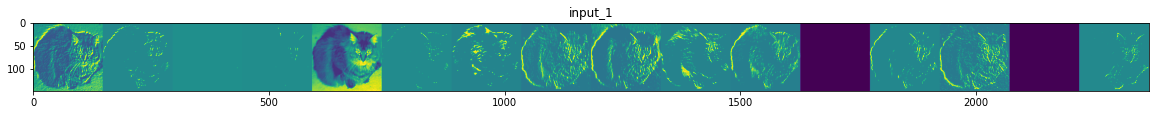

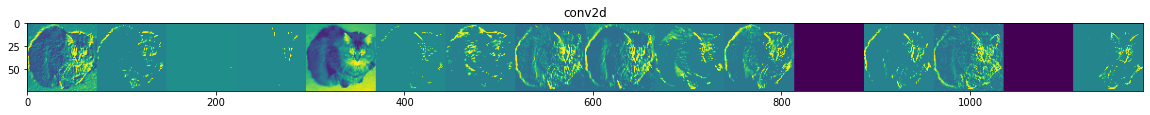

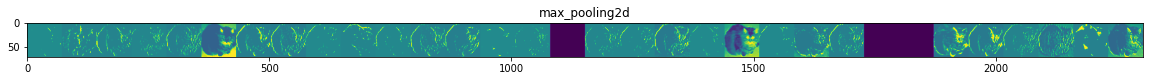

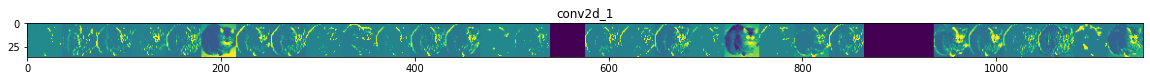

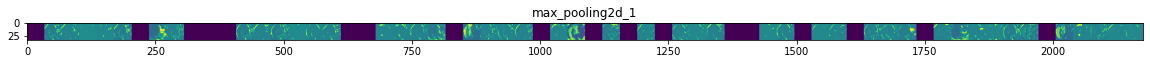

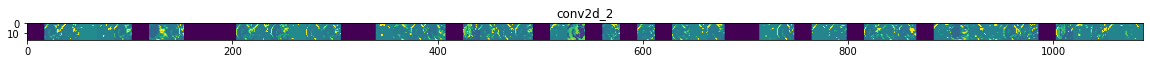

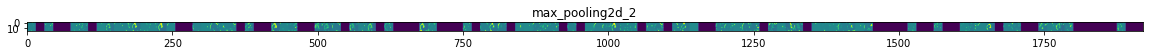

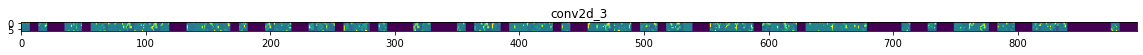

In [19]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_file_names]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_file_names]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Evaluating Accuracy and Luss for the Model

Text(0.5, 1.0, 'Training and validation loss')

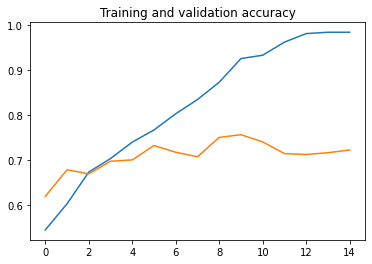

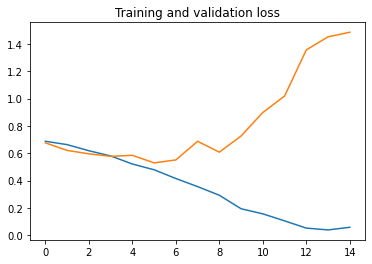

In [20]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As can be seen, the model achieves an accuracy of almost 100% (in blue), while the validation accuracy stalls as 70%. This is a classic problem in machine learning and is known as **overfitting**. This shouldn't be a problem for now, however, because the network is adequately trained to use the deep dream algorithm.